In [1]:
import cosmology as cosmo, basic
import numpy as np, curvedsky, prjlib, plottools as pl, tools_y, binning as bn, tools_qrec, analysis as ana
from scipy.signal import savgol_filter
from matplotlib.pyplot import *

In [2]:
cps = {'H0':67.5,'Om':.31,'Ov':.69,'w0':-1.,'wa':0.}
Obh2 = .0223
bias = 6.
model = 'TH'
alpha = 0.

In [3]:
cl = {}
l, cl[100] = (np.loadtxt('../data/other/tt_'+model+'_R100.0_a'+str(alpha)+'.dat',usecols=(0,1))).T
l, cl[10] = (np.loadtxt('../data/other/tt_'+model+'_R10.0_a'+str(alpha)+'.dat',usecols=(0,1))).T

In [4]:
mb = bn.multipole_binning(10,lmin=1,lmax=500)
p = prjlib.init_analysis(dtype='dr2_smica',fltr='cinv',wtype='Lmask')
__, __, __, __, qobj = tools_qrec.init_quad(p.ids,p.stag,rlmin=100,rlmax=2048)
cy = tools_y.init_compy(p.ids,masktype=0,ytype='nilc',ascale=1.0)
al = (np.loadtxt(qobj.f['TT'].al)).T[1]
yy = savgol_filter( (np.loadtxt(cy.fclyy)).T[1], 51, 3)
vl = np.sqrt(al*yy)/np.sqrt(qobj.l+1e-30)
fx = tools_y.init_cross(qobj,cy,p.ids,p.stag)
mcb, vcb, scb, ocb = bn.binned_spec(mb,fx.xl,cn=1,opt=True,vl=vl)

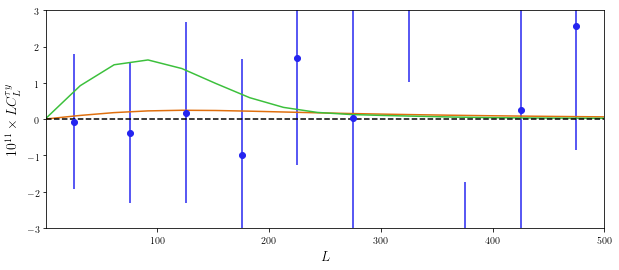

In [5]:
pl.plot_1dstyle(fsize=[10,4],xmin=1,xmax=500,ymin=-3,ymax=3,ylab=r'$10^{11}\times LC_L^{\tau y}$',usetex=True)
s = 1e11
errorbar(mb.bc,s*mb.bc*ocb,yerr=s*mb.bc*vcb,fmt='o')
plot(l,s*l*cl[10]*1.7e-6)
plot(l,s*l*cl[100]*1.7e-6)
axhline(0,color='k',ls='--')

In [6]:
MB = bn.multipole_binning(20,lmin=1,lmax=2048)
vl = al/np.sqrt(qobj.l+1e-30)
mtt, __, stt, ott = bn.binned_spec(MB,qobj.f['TT'].cl,cn=1,doreal=True,opt=True,vl=vl)
n0 = (np.loadtxt(qobj.f['TT'].n0bs)).T[1]
nb = bn.binning(n0,MB,vl=vl)
rd = np.array( [ (np.loadtxt(qobj.f['TT'].rdn0[i])).T[1] for i in p.rlz ] )
rb = bn.binning(rd,MB,vl=vl)
ott = ott - rb[0] - nb/(qobj.mfsim)
mtt = mtt - np.mean(rb[1:,:],axis=0) - nb/(qobj.mfsim-1)
ott = ott - mtt # subtract average of sim
stt = stt - rb[1:,:] - nb/(qobj.mfsim-1)
vtt = np.std(stt,axis=0)

In [7]:
#L, CL = (np.loadtxt('../data/plk/tau/N18/tt_AS_R'+str(R0)+'_a'+str(alpha)+'.dat',usecols=(0,1))).T

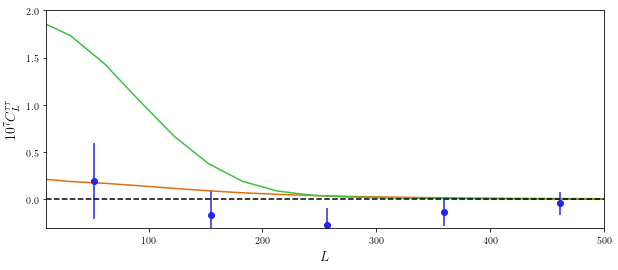

In [8]:
pl.plot_1dstyle(fsize=[10,4],xmin=10,xmax=500,ymin=-0.3,ymax=2,ylab=r'$10^7 C_L^{\tau\tau}$',usetex=True)
s = 1e7
errorbar(MB.bc,s*ott,yerr=s*vtt,fmt='o')
plot(l,cl[10]*s)
plot(l,cl[100]*s)
#plot(L,CL*s)
axhline(0,color='k',ls='--')

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


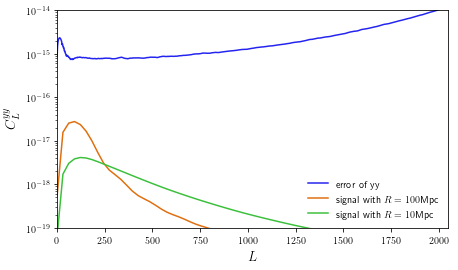

In [9]:
pl.plot_1dstyle(fsize=[7,4],xmin=2,xmax=2048,ylog=True,ymin=1e-19,ymax=1e-14,ylab=r'$C_L^{yy}$',usetex=True)
ll = np.linspace(0,2048,2049)
plot(ll,ll*yy/np.sqrt(ll),label='error of yy')
plot(l,l*cl[100]*1.7e-6**2,label=r'signal with $R=100$Mpc')
plot(l,l*cl[10]*1.7e-6**2,label=r'signal with $R=10$Mpc')
legend()